# Data importation and Accessing 

In [42]:
# importation of libraries
import pandas as pd
import numpy as np
import seaborn as sns # importation seaborn package

import matplotlib.pyplot as plt # importation of matplotlib

In [43]:
# import the data into dataframe
df = pd.read_csv("Book.csv")

In [44]:
# print the first five rows
df.head(5)

,Gender,HourlyRate,JobRole,MaritalStatus,OverTime,MonthlyIncome
0,Female,94,Sales Executive,Single,Yes,NaN
1,Male,61,Research Scientist,Married,No,5130.0
2,NaN,92,Laboratory Technician,Single,Yes,2090.0
3,Female,56,Research Scientist,Married,Yes,2909.0
4,Male,40,NaN,NaN,No,NaN


In [45]:
# print the last five rows
df.tail(5)

,Gender,HourlyRate,JobRole,MaritalStatus,OverTime,MonthlyIncome
28,Female,42,Healthcare Representative,Married,No,10248.0
29,Female,83,NaN,Single,No,NaN
30,Male,78,Laboratory Technician,Single,No,2496.0
31,Male,41,Healthcare Representative,Married,Yes,6465.0
32,Female,53,Research Director,Single,No,2206.0


In [46]:
# print the first five rows
df.head(5)

,Gender,HourlyRate,JobRole,MaritalStatus,OverTime,MonthlyIncome
0,Female,94,Sales Executive,Single,Yes,NaN
1,Male,61,Research Scientist,Married,No,5130.0
2,NaN,92,Laboratory Technician,Single,Yes,2090.0
3,Female,56,Research Scientist,Married,Yes,2909.0
4,Male,40,NaN,NaN,No,NaN


In [47]:
# randomly print 10 rows in the dataframe
df.sample(10)

,Gender,HourlyRate,JobRole,MaritalStatus,OverTime,MonthlyIncome
7,6,67,NaN,Divorced,No,2693.0
31,Male,41,Healthcare Representative,Married,Yes,6465.0
14,NaN,50,Laboratory Technician,Single,Yes,2028.0
26,Female,72,Research Scientist,Single,Yes,3919.0
32,Female,53,Research Director,Single,No,2206.0
6,Female,81,Laboratory Technician,Married,Yes,2670.0
5,Male,79,Laboratory Technician,Single,p,3068.0
24,Male,83,Research Scientist,Single,No,NaN
4,Male,40,NaN,NaN,No,NaN
18,Female,78,Manager,Married,No,15427.0


In [48]:
# check the dimension of the dataframe
df.shape

(33, 6)

In [49]:
# check the columns of the dataset
df.columns

Index(['Gender', 'HourlyRate', 'JobRole', 'MaritalStatus', 'OverTime',
       'MonthlyIncome'],
      dtype='object')

In [50]:
# print the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         30 non-null     object 
 1   HourlyRate     33 non-null     int64  
 2   JobRole        27 non-null     object 
 3   MaritalStatus  31 non-null     object 
 4   OverTime       30 non-null     object 
 5   MonthlyIncome  26 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


The dataframe consist of six columns and 33 records,  some of the columns consist of missing values which will be dealt with later on the project, the Overtime, Maritalstatus and gender columns are of object datatpe, Hourly rate column is int datatype while MonthlyIncome is floats datatype

In [51]:
# check for missing values
df.isna().sum()

Gender           3
HourlyRate       0
JobRole          6
MaritalStatus    2
OverTime         3
MonthlyIncome    7
dtype: int64

In [52]:
# Check for  duplicate
df.duplicated().sum()

0

In [53]:
# make a copy of the original dataframe
df_copy = df.copy()

# Data Cleaning

In [54]:
# to dealt with the dirty records in the gender column, find the most frequent records and 
# replace it with the dirty records
most_frq=df_copy.Gender.mode()[0]

In [55]:
# replace the unwanted character with most common value
df_copy["Gender"] =df_copy.Gender.replace(["6", "0", "?", ],most_frq )

# fill the missing values with most frequent
df_copy["Gender"].fillna(most_frq, inplace=True)

In [56]:
most_frq=df_copy["MaritalStatus"].mode()[0]

#replace the unwanted character with most common value
df_copy["MaritalStatus"] =df_copy.MaritalStatus.replace(["/"], most_frq )

# fill the missing values with most frequent
df_copy["MaritalStatus"].fillna(most_frq, inplace=True)

In [60]:
# fill the missing values in the jobrole column with the most frequent
most_freq=df_copy.JobRole.mode()[0]


df_copy.JobRole.fillna(most_freq, inplace=True)

In [62]:
# fill the missing values in the OverTime column with the most frequent
most_freq=df_copy.OverTime.mode()[0]
df_copy.OverTime.fillna(most_freq, inplace=True)

df_copy["OverTime"] =df_copy.OverTime.replace(["p"], most_frq )

In [67]:
# fill the missing values in monthlyincome with mean values=
mean=df_copy.MonthlyIncome.mean()
df_copy.MonthlyIncome.fillna(mean, inplace=True)

In [68]:
df_copy

,Gender,HourlyRate,JobRole,MaritalStatus,OverTime,MonthlyIncome
0,Female,94,Sales Executive,Single,Single,5653.884615
1,Male,61,Research Scientist,Married,Married,5130.000000
2,Male,92,Laboratory Technician,Single,Single,2090.000000
3,Female,56,Research Scientist,Married,Married,2909.000000
4,Male,40,Laboratory Technician,Single,Single,5653.884615
5,Male,79,Laboratory Technician,Single,Single,3068.000000
6,Female,81,Laboratory Technician,Married,Married,2670.000000
7,Male,67,Laboratory Technician,Divorced,Divorced,2693.000000
8,Male,44,Manufacturing Director,Single,Single,9526.000000
9,Male,94,Healthcare Representative,Married,Married,5237.000000


# Data Exploration

# 1. Univariate Analysis

# What of the total count of male and the female in the dataset?

In [73]:
# total count  of gender
gender_count=df_copy["Gender"].value_counts()
gender_count

Male      21
Female    12
Name: Gender, dtype: int64

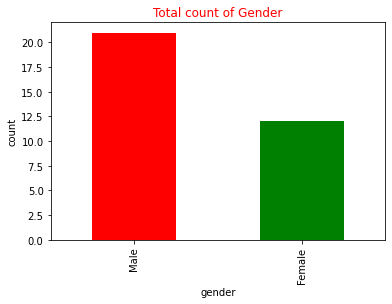

In [83]:
# plot using pandas plot
gender_count.plot(kind="bar", color= ["red", "green"])
plt.title("Total count of Gender", color="red")
plt.ylabel("count")
plt.xlabel("gender")
plt.show()

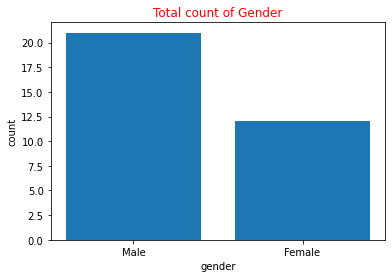

In [114]:
# plot using matplotlib
r=gender_count.to_frame() # convert series to dataframe
plt.bar(x=r.index, height=r.values.flatten())
plt.title("Total count of Gender", color="red")
plt.ylabel("count")
plt.xlabel("gender")
plt.show()

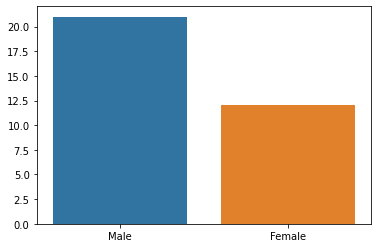

In [116]:
sns.barplot(x=r.index, y=r.values.flatten())
plt.show()

<AxesSubplot:ylabel='Frequency'>

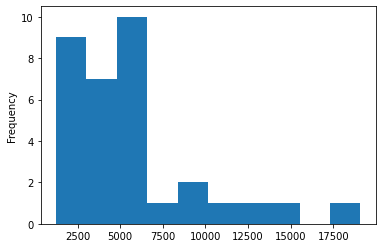

In [122]:
df_copy["MonthlyIncome"].plot(kind='hist')

<AxesSubplot:>

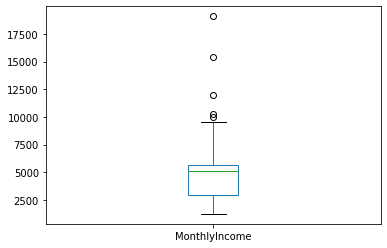

In [123]:
df_copy["MonthlyIncome"].plot(kind='box')

In [128]:
df_copy.JobRole.value_counts()

Laboratory Technician        15
Research Scientist            6
Manufacturing Director        3
Healthcare Representative     3
Sales Executive               2
Research Director             2
Manager                       2
Name: JobRole, dtype: int64

# Bivariate

In [158]:
t=df_copy.groupby(by="JobRole").agg({"MonthlyIncome": "mean"}).sort_values("MonthlyIncome", 
                                                                      ascending=False)
t

,MonthlyIncome
JobRole,
Manager,17260.500000
Manufacturing Director,7839.000000
Healthcare Representative,7316.666667
Research Director,7100.000000
Sales Executive,6239.442308
Laboratory Technician,3851.294872
Research Scientist,3690.314103


<BarContainer object of 7 artists>

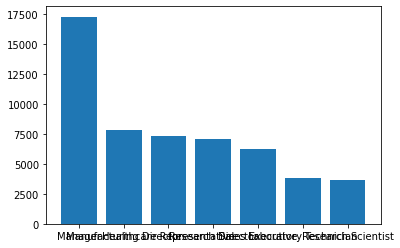

In [151]:
plt.bar(x=t.index, height=t.MonthlyIncome)

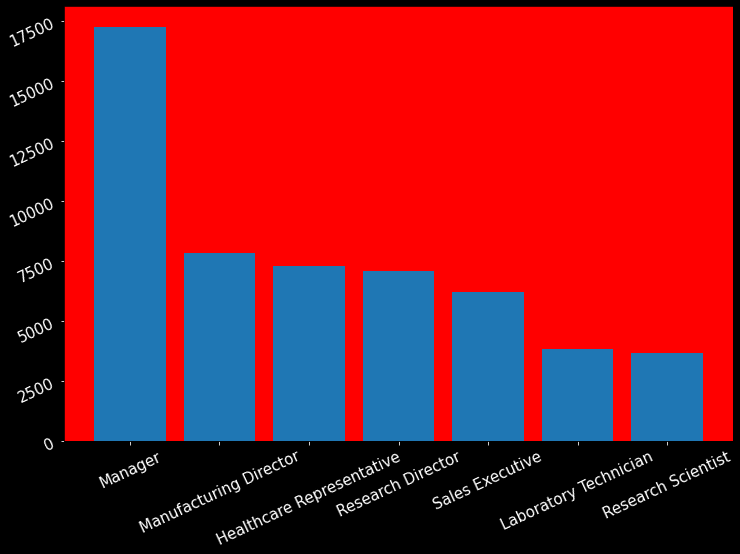

In [157]:
fig, ax = plt.subplots(figsize=(12,8), facecolor="black")
ax.bar(x=t.index, height=t.MonthlyIncome)
ax.set_facecolor("red")
ax.tick_params(axis='x', colors="white",labelsize=15, labelrotation= 25,grid_color= "green")
ax.tick_params(axis='y', colors="white",labelsize=15, labelrotation= 25,grid_color= "green") 